In [1]:
!pip install easyocr
!pip install imutils

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

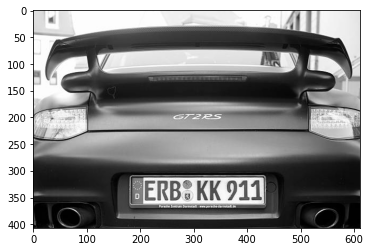

In [3]:
img = cv2.imread('CAR2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))  #cause matplotlib expects rgb

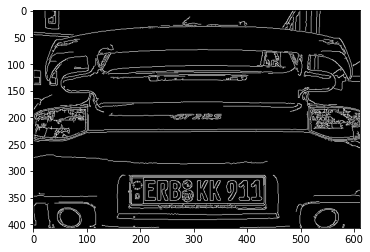

In [4]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [5]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #returns contours in simplified approx formin a tree structure
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [6]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True) #approx roughness that is dents will ignore that is numbers
    if len(approx) == 4:
        location = approx
        break

In [7]:
location

array([[[206, 314]],

       [[429, 312]],

       [[432, 359]],

       [[207, 361]]], dtype=int32)

In [8]:
mask = np.zeros(gray.shape, np.uint8)
#cnt = np.array([[50,50], [50,150], [150,150], [150,50]],dtype=np.int32)
#new_image = cv2.fillPoly(mask,[contours],color =(0, 255, -1))
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

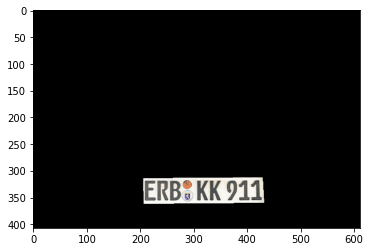

In [9]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [10]:
(x,y) = np.where(mask==255)   #restoring area where image is not black
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

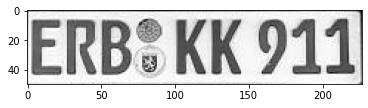

In [11]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [12]:
#pip install pytesseract

In [13]:
#import pytesseract

In [14]:
#pytesseract.pytesseract.tesseract_cmd = r'c:\\Program Files\\Tesseract-OCR\\tesseract.exe'#

In [15]:
#text = pytesseract.image_to_string(cropped_image)

In [16]:
#text

In [17]:
#print(text)

In [18]:
import easyocr

In [19]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(cropped_image)
result

Using CPU. Note: This module is much faster with a GPU.


[([[0, 0], [227, 0], [227, 50], [0, 50]], 'ERB? KK 911', 0.6232380925270284)]

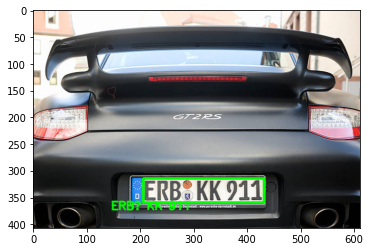

In [20]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0]-60, approx[1][0][1]+60), fontFace=font, fontScale=0.7, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [21]:
text

'ERB? KK 911'

In [22]:
#text = text.split('S')

In [23]:
#text

In [24]:
text = text.replace('?','')

In [25]:
word = text.split()

In [26]:
#word

In [27]:
city_name = word[0]

In [28]:
#city_name

In [29]:
import chardet
import pandas as pd

with open('Number_Plate.csv', 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large
    
data = pd.read_csv('Number_Plate.csv', encoding = enc['encoding'])

In [30]:
data

,Code;District/City Name;Sit In
0,A;Augsburg (Stadt);Augsburg
1,A;Augsburg (Kreis);Augsburg
2,AA;Ostalbkreis;Aalen
3,AB;Aschaffenburg (Stadt);Aschaffenburg
4,AB;Aschaffenburg (Kreis);Aschaffenburg
...,...
411,WUG;Weißenburg-Gunzenhausen;Weißenburg
412,WUN;Wunsiedel;Wunsiedel
413,WW;Westerwaldkreis;Montabaur
414,Z;Zwickau;Zwickau


In [31]:
data['Code;District/City Name;Sit In'].str.split(';')

0                 [A, Augsburg (Stadt), Augsburg]
1                 [A, Augsburg (Kreis), Augsburg]
2                        [AA, Ostalbkreis, Aalen]
3      [AB, Aschaffenburg (Stadt), Aschaffenburg]
4      [AB, Aschaffenburg (Kreis), Aschaffenburg]
                          ...                    
411    [WUG, Weißenburg-Gunzenhausen, Weißenburg]
412                   [WUN, Wunsiedel, Wunsiedel]
413              [WW, Westerwaldkreis, Montabaur]
414                         [Z, Zwickau, Zwickau]
415                [ZW, Zweibrücken, Zweibrücken]
Name: Code;District/City Name;Sit In, Length: 416, dtype: object

In [32]:
data['Code;District/City Name;Sit In'].str.split(';', expand = True)

,0,1,2
0,A,Augsburg (Stadt),Augsburg
1,A,Augsburg (Kreis),Augsburg
2,AA,Ostalbkreis,Aalen
3,AB,Aschaffenburg (Stadt),Aschaffenburg
4,AB,Aschaffenburg (Kreis),Aschaffenburg
...,...,...,...
411,WUG,Weißenburg-Gunzenhausen,Weißenburg
412,WUN,Wunsiedel,Wunsiedel
413,WW,Westerwaldkreis,Montabaur
414,Z,Zwickau,Zwickau


In [33]:
data = data['Code;District/City Name;Sit In'].str.split(';', expand = True)

In [34]:
data.columns = ['Code', 'City_Name', 'Stadt']

In [35]:
#data

In [36]:
City_Name = data.loc[(data['Code'] == city_name)].count()

In [37]:
#City_Name

In [38]:
data.loc[data['Code'] == city_name].shape[0]

1

In [39]:
City_Name = data.loc[(data['Code'] == city_name)].describe()

In [40]:
#City_Name

In [41]:
City_Name['Stadt']

count          1
unique         1
top       Erbach
freq           1
Name: Stadt, dtype: object